# 서울시 CCTV 현황 분석


## https://opengov.seoul.go.kr

# O. 한글폰트 설치 후 진행

> ## 1) 한글 폰트 설치

In [ ]:
# import matplotlib.font_manager as fm

# # Linux
# !apt-get -qq -y install fonts-nanum > /dev/null

# # Colab
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname = fontpath, size = 10)
# fm._rebuild()

> ## 2) <font color = 'red'>설치 후 '**런타임 다시 시작**'</font>

* 런타임 강제 종료 후 다시 시작

In [ ]:
# import os

# os.kill(os.getpid(), 9)

> ## 3) 한글 폰트 설정

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# import matplotlib.font_manager as fm

# mpl.rcParams['axes.unicode_minus'] = False
	
# path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
# font_name = fm.FontProperties(fname = path, size = 10).get_name()
# plt.rc('font', family = font_name)
# fm._rebuild()

In [1]:
import matplotlib.pyplot as plt
import matplotlib as rc
from matplotlib import rcParams
import matplotlib.font_manager as fm
from pathlib import Path
import matplotlib.patches as mpatches

# 한글만 사용시 
rcParams['font.family'] = 'Malgun Gothic'

# # 특정 한글 폰트 사용시
# font_path = Path('C:/Users/SBAUser/PycharmProjects/SESAC_AIoT/example/secret/font/nanum-gothic/NanumGothic.ttf')
# fontprop = fm.FontProperties(fname=font_path, size=10)

# I. 'seoulCCTV.csv' 파일 전처리

In [2]:
import warnings
warnings.filterwarnings('ignore')

> ## 1) 'seoulCCTV.csv' 파일 읽어오기

In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/seoulCCTV.csv'
CCTV = pd.read_csv(url)

CCTV.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


> ## 2) '기관명'을 '구별'로 변경

* 열(Column) 이름 확인

In [4]:
CCTV.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

* 첫번째 열 이름 변경('기관명' -> '구별') 

In [51]:
CCTV.rename(columns={'기관명':'구별'}, inplace=True)
CCTV.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


> ## 3) CCTV 데이터 현황 파악

* '소계' 오름차순 정렬

In [52]:
CCTV.sort_values(by='소계', ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
9,도봉구,825,238,159,42,386,246.638655
2,강북구,831,369,120,138,204,125.203252
5,광진구,878,573,78,53,174,53.228621
3,강서구,911,388,258,184,81,134.793814
24,중랑구,916,509,121,177,109,79.960707


* '소계' 내림차순 정렬

In [53]:
CCTV.sort_values(by='소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
18,양천구,2482,1843,142,30,467,34.671731
14,서초구,2297,1406,157,336,398,63.371266
4,관악구,2109,846,260,390,613,149.290780
21,은평구,2108,1138,224,278,468,85.237258


> ## 4) '최근증가율' 열(Column) 추가

* 최근 3년 CCTV '최근증가율' 열 추가

In [54]:
CCTV['최근증가율'] = ((CCTV['2016년'] + CCTV['2015년'] + CCTV['2014년']) / CCTV['2013년도 이전']) * 100

In [55]:
CCTV.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


* '최근증가율' 열로 내림차순 정렬

In [56]:
CCTV.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


# II.  'seoulPopulation.xlsx' 파일 전처리

> ## 1) 'seoulPopulation.xlsx' 파일 읽어오기

In [12]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/seoulPopulation.xlsx'
SDFP = pd.read_excel(url, 
                     header = 2, # 어느 행에 열의 이름이 있는지 지정
                     usecols = 'B, D, G, J, N') # 기본값은 none으로 열을 모두 불러옴, 원하는 열을 불러온다.

SDFP.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604,9926968,270636,1321458
1,종로구,162820,153589,9231,25425
2,중구,133240,124312,8928,20764
3,용산구,244203,229456,14747,36231
4,성동구,311244,303380,7864,39997


> ## 2) 열(Column) 이름 변경

In [13]:
SDFP.rename(columns={SDFP.columns[0]:'구별', 
                     SDFP.columns[1]:'인구수', 
                     SDFP.columns[2]:'한국인', 
                     SDFP.columns[3]:'외국인', 
                     SDFP.columns[4]:'고령자'}, inplace=True)

In [14]:
SDFP.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604,9926968,270636,1321458
1,종로구,162820,153589,9231,25425
2,중구,133240,124312,8928,20764
3,용산구,244203,229456,14747,36231
4,성동구,311244,303380,7864,39997


> ## 3) NaN 확인

* .info( )

In [15]:
SDFP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      26 non-null     object
 1   인구수     26 non-null     int64 
 2   한국인     26 non-null     int64 
 3   외국인     26 non-null     int64 
 4   고령자     26 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


* .value_counts( )
 - '합계' 삭제 필요

In [19]:
SDFP['구별'].value_counts()

합계      1
종로구     1
송파구     1
강남구     1
서초구     1
관악구     1
동작구     1
영등포구    1
금천구     1
구로구     1
강서구     1
양천구     1
마포구     1
서대문구    1
은평구     1
노원구     1
도봉구     1
강북구     1
성북구     1
중랑구     1
동대문구    1
광진구     1
성동구     1
용산구     1
중구      1
강동구     1
Name: 구별, dtype: int64

* .unique( )

In [117]:
len(SDFP['구별'])

26

In [34]:
SDFP['구별'].nunique()

26

> ## 4) 인구 데이터 현황 파악

* '합계' 행(Row) 삭제

In [37]:
SDFP1 = SDFP.drop(index=0, axis=1)


,구별,인구수,한국인,외국인,고령자
1,종로구,162820,153589,9231,25425
2,중구,133240,124312,8928,20764
3,용산구,244203,229456,14747,36231
4,성동구,311244,303380,7864,39997
5,광진구,372164,357211,14953,42214


* '합계' 행(Row) 삭제 확인

In [118]:
len(SDFP1['구별'])

25

In [39]:
SDFP1['구별'].nunique()

25

> ## 5) 파생변수 추가

* '외국인비율'과 '고령자비율' 열(Column)을 계산 후 추가

In [40]:
SDFP1['외국인비율'] = SDFP['외국인'] / SDFP['인구수'] * 100
SDFP1['고령자비율'] = SDFP['고령자'] / SDFP['인구수'] * 100

In [41]:
SDFP1.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820,153589,9231,25425,5.669451,15.615404
2,중구,133240,124312,8928,20764,6.700690,15.583909
3,용산구,244203,229456,14747,36231,6.038828,14.836427
4,성동구,311244,303380,7864,39997,2.526635,12.850689
5,광진구,372164,357211,14953,42214,4.017852,11.342849


* '인구수' 내림차순 정렬

In [42]:
SDFP1.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483,660584,6899,72506,1.033584,10.862599
16,강서구,603772,597248,6524,72548,1.080540,12.015794
23,강남구,570500,565550,4950,63167,0.867660,11.072217
11,노원구,569384,565565,3819,71941,0.670725,12.634883
21,관악구,525515,507203,18312,68082,3.484582,12.955291


* '외국인' 내림차순 정렬

In [43]:
SDFP1.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985,368072,34913,52413,8.663598,13.006191
17,구로구,447874,416487,31387,56833,7.007998,12.689506
18,금천구,255082,236353,18729,32970,7.342345,12.925255
21,관악구,525515,507203,18312,68082,3.484582,12.955291
6,동대문구,369496,354079,15417,54173,4.172440,14.661322


* '외국인비율' 내림차순 정렬

In [44]:
SDFP1.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985,368072,34913,52413,8.663598,13.006191
18,금천구,255082,236353,18729,32970,7.342345,12.925255
17,구로구,447874,416487,31387,56833,7.007998,12.689506
2,중구,133240,124312,8928,20764,6.700690,15.583909
3,용산구,244203,229456,14747,36231,6.038828,14.836427


* '고령자' 내림차순 정렬

In [45]:
SDFP1.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772,597248,6524,72548,1.080540,12.015794
24,송파구,667483,660584,6899,72506,1.033584,10.862599
12,은평구,494388,489943,4445,72334,0.899091,14.631019
11,노원구,569384,565565,3819,71941,0.670725,12.634883
21,관악구,525515,507203,18312,68082,3.484582,12.955291


* '고령자비율' 내림차순 정열

In [46]:
SDFP1.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192,326686,3506,54813,1.061806,16.600342
1,종로구,162820,153589,9231,25425,5.669451,15.615404
2,중구,133240,124312,8928,20764,6.700690,15.583909
3,용산구,244203,229456,14747,36231,6.038828,14.836427
13,서대문구,327163,314982,12181,48161,3.723221,14.720797


# III. CCTV 데이터와 인구 데이터 합치기

> ## 1) 두 데이터프레임에 공통으로 있는 '구별'로 merge

In [57]:
DF = pd.merge(CCTV, SDFP1, on = '구별')

In [58]:
DF.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,570500,565550,4950,63167,0.867660,11.072217
1,강동구,1010,379,99,155,377,166.490765,453233,449019,4214,54622,0.929765,12.051638
2,강북구,831,369,120,138,204,125.203252,330192,326686,3506,54813,1.061806,16.600342
3,강서구,911,388,258,184,81,134.793814,603772,597248,6524,72548,1.080540,12.015794
4,관악구,2109,846,260,390,613,149.290780,525515,507203,18312,68082,3.484582,12.955291


In [59]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   구별         25 non-null     object 
 1   소계         25 non-null     int64  
 2   2013년도 이전  25 non-null     int64  
 3   2014년      25 non-null     int64  
 4   2015년      25 non-null     int64  
 5   2016년      25 non-null     int64  
 6   최근증가율      25 non-null     float64
 7   인구수        25 non-null     int64  
 8   한국인        25 non-null     int64  
 9   외국인        25 non-null     int64  
 10  고령자        25 non-null     int64  
 11  외국인비율      25 non-null     float64
 12  고령자비율      25 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 2.7+ KB


> ## 2) 불필요한 열(Column) 삭제

In [60]:
del DF['2013년도 이전']
del DF['2014년']
del DF['2015년']
del DF['2016년']

In [61]:
DF.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,570500,565550,4950,63167,0.867660,11.072217
1,강동구,1010,166.490765,453233,449019,4214,54622,0.929765,12.051638
2,강북구,831,125.203252,330192,326686,3506,54813,1.061806,16.600342
3,강서구,911,134.793814,603772,597248,6524,72548,1.080540,12.015794
4,관악구,2109,149.290780,525515,507203,18312,68082,3.484582,12.955291


> ## 3) '구별'을 index로 지정

In [63]:
DF.set_index('구별', inplace=True)
DF.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500,565550,4950,63167,0.867660,11.072217
강동구,1010,166.490765,453233,449019,4214,54622,0.929765,12.051638
강북구,831,125.203252,330192,326686,3506,54813,1.061806,16.600342
강서구,911,134.793814,603772,597248,6524,72548,1.080540,12.015794
관악구,2109,149.290780,525515,507203,18312,68082,3.484582,12.955291


> ## 4) 상관계수(Correlation Coefficient)

* 범위 : -1 ~ 1(0이면 관계없음)
* '고령자비율' vs. '소계'

In [64]:
import numpy as np

print(np.corrcoef(DF['고령자비율'], DF['소계']))

[[ 1.         -0.25866272]
 [-0.25866272  1.        ]]


* '외국인비율' vs. '소계'

In [65]:
print(np.corrcoef(DF['외국인비율'], DF['소계']))

[[ 1.         -0.05230165]
 [-0.05230165  1.        ]]


* '인구수'     vs. '소계'

In [66]:
print(np.corrcoef(DF['인구수'], DF['소계']))

[[1.        0.2432198]
 [0.2432198 1.       ]]


> ## 5) CCTV 개수('소계')와 '인구수'의 관계

* '소계'(CCTV 개수) 내림차순 정렬

In [68]:
CCTV.sort_values(by='소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
18,양천구,2482,1843,142,30,467,34.671731
14,서초구,2297,1406,157,336,398,63.371266
4,관악구,2109,846,260,390,613,149.290780
21,은평구,2108,1138,224,278,468,85.237258


* '인구수' 내림차순 정렬

In [70]:
SDFP1.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483,660584,6899,72506,1.033584,10.862599
16,강서구,603772,597248,6524,72548,1.080540,12.015794
23,강남구,570500,565550,4950,63167,0.867660,11.072217
11,노원구,569384,565565,3819,71941,0.670725,12.634883
21,관악구,525515,507203,18312,68082,3.484582,12.955291


# IV. Visualization

> ## 1) 막대(bar) 그래프 - pandas

* '소계'

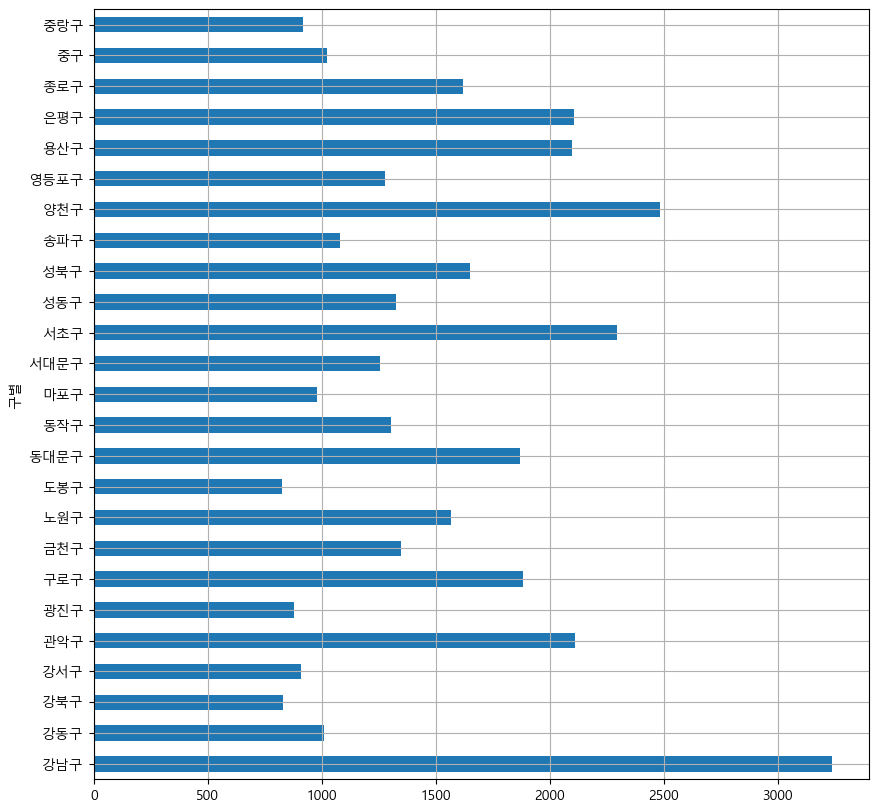

In [119]:
DF['소계'].plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.show()

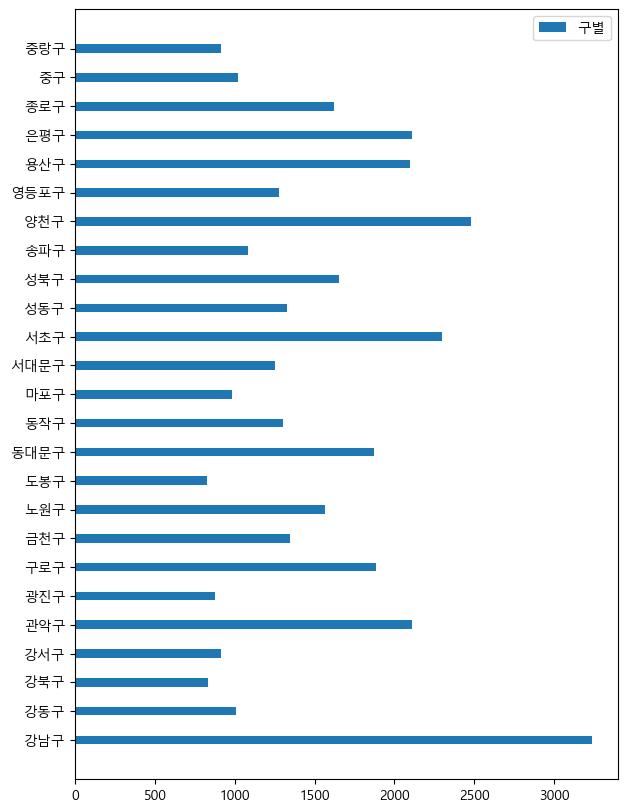

In [82]:
plt.figure(figsize = (7, 10))

plt.barh(CCTV['구별'], 
         width = CCTV['소계'], height = 0.3,
         label = '구별')

plt.legend()
dataplt.show()

* 정렬 - sort_value( )


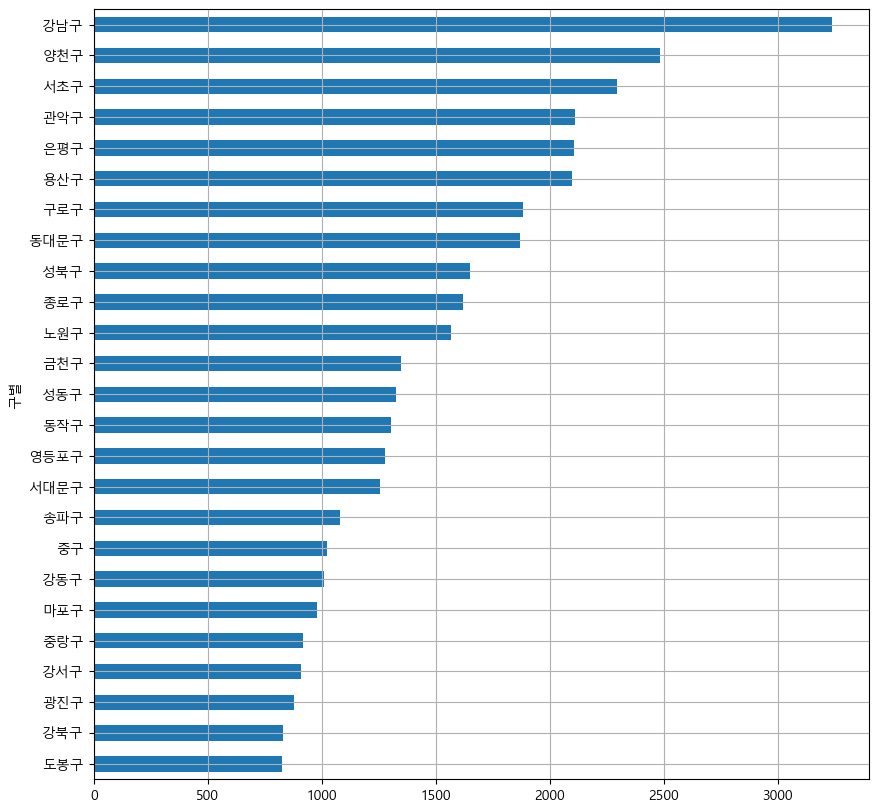

In [120]:
DF['소계'].sort_values().plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.show()

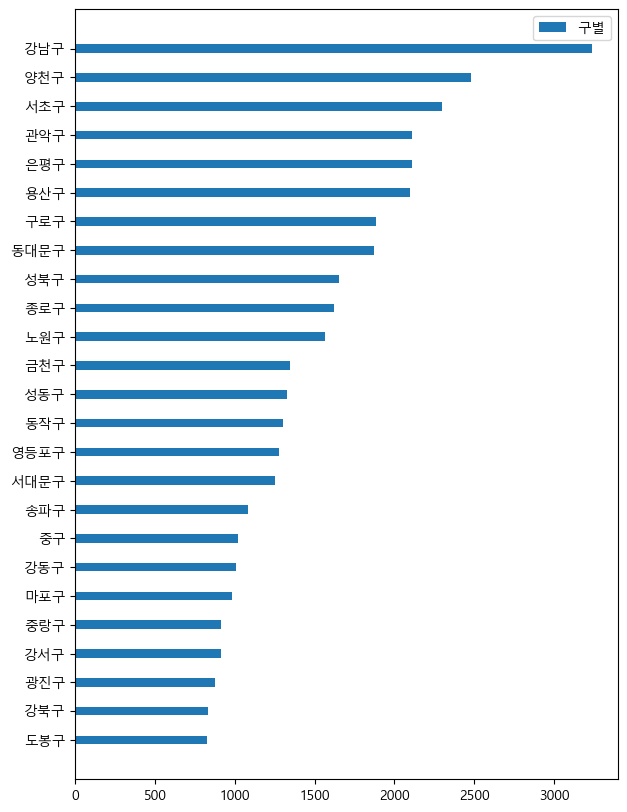

In [88]:
df = DF.sort_values(by='소계', ascending=True)
plt.figure(figsize = (7, 10))

plt.barh(df.index, 
         width = df['소계'], height = 0.3,
         label = '구별')

plt.legend()
plt.show()

* '인구수' 대비 CCTV비율 계산 후 정렬하여 시각화

In [93]:
DF['인구수 대비 CCTV비율'] = round(DF['소계'] / DF['인구수'] * 100, 2)
DF.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구수 대비 CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,570500,565550,4950,63167,0.867660,11.072217,0.57
강동구,1010,166.490765,453233,449019,4214,54622,0.929765,12.051638,0.22
강북구,831,125.203252,330192,326686,3506,54813,1.061806,16.600342,0.25
강서구,911,134.793814,603772,597248,6524,72548,1.080540,12.015794,0.15
관악구,2109,149.290780,525515,507203,18312,68082,3.484582,12.955291,0.40


In [96]:
DF.sort_values(by='인구수 대비 CCTV비율', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구수 대비 CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,162820,153589,9231,25425,5.669451,15.615404,0.99
용산구,2096,53.216374,244203,229456,14747,36231,6.038828,14.836427,0.86
중구,1023,147.699758,133240,124312,8928,20764,6.700690,15.583909,0.77
강남구,3238,150.619195,570500,565550,4950,63167,0.867660,11.072217,0.57
금천구,1348,100.000000,255082,236353,18729,32970,7.342345,12.925255,0.53


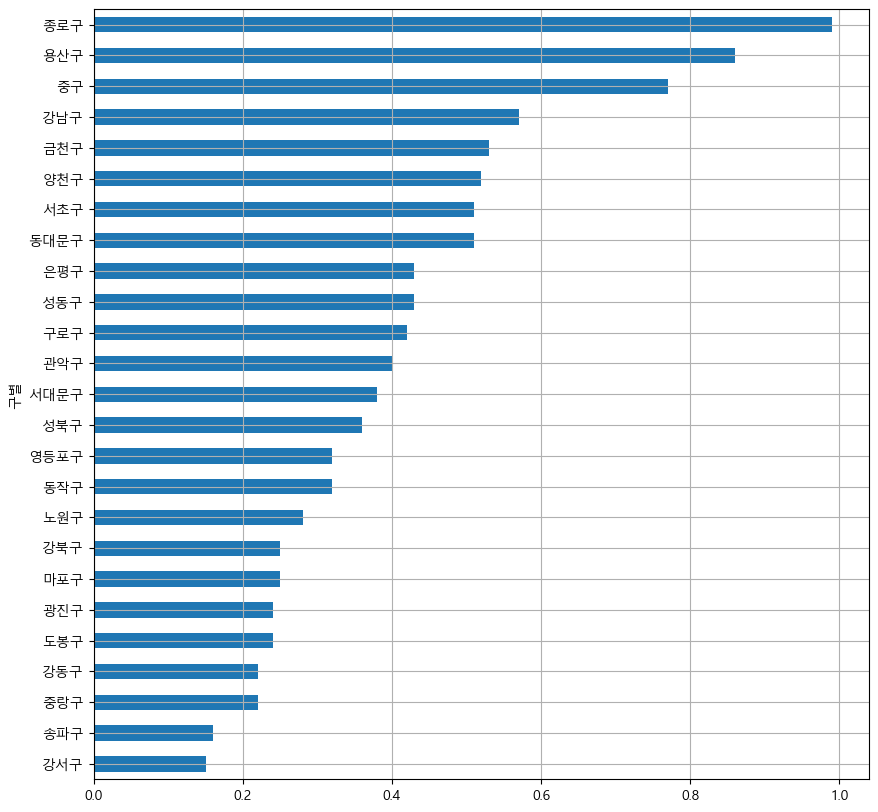

In [122]:
DF['인구수 대비 CCTV비율'].sort_values().plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.show()

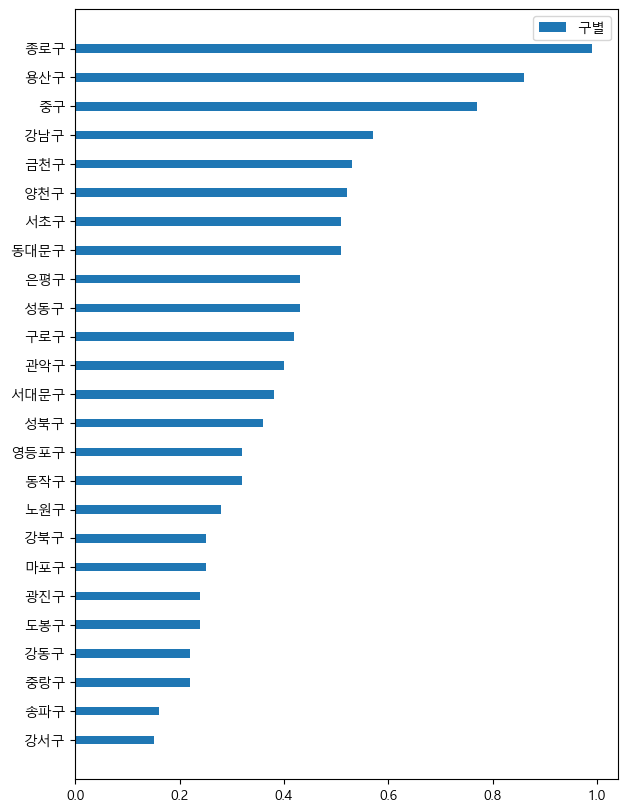

In [98]:
df = DF.sort_values(by='인구수 대비 CCTV비율', ascending=True)
plt.figure(figsize = (7, 10))

plt.barh(df.index, 
         width = df['인구수 대비 CCTV비율'], height = 0.3,
         label = '구별')

plt.legend()
plt.show()

> ## 2) 산점도(scatter) - matplotlib

* '소계' ~ '인구수'

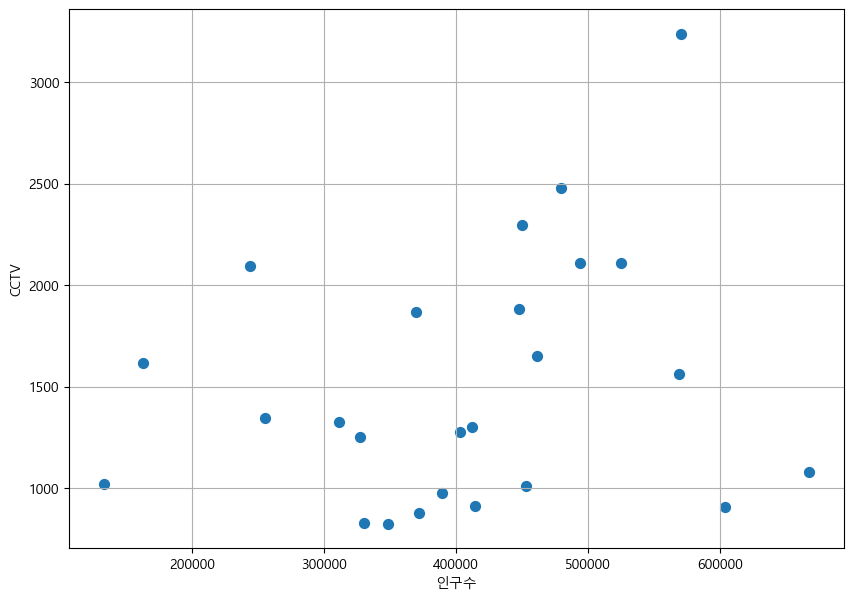

In [123]:
plt.figure(figsize=(10, 7))
plt.scatter(DF['인구수'], DF['소계'], s = 50)

plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

> ## 3) 회귀선 추가 - seaborn

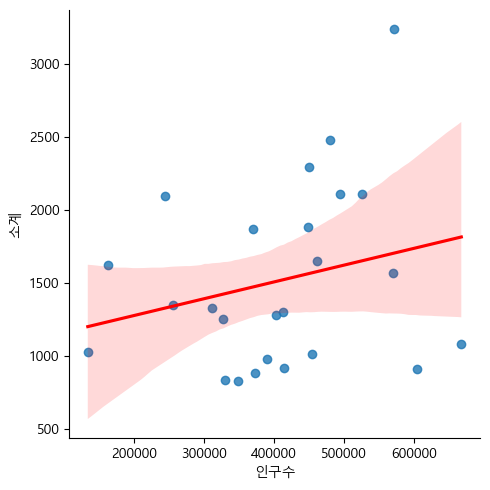

In [116]:
import seaborn as sns

sns.lmplot(x='인구수' ,y='소계', data = DF, line_kws={'color':'red'})


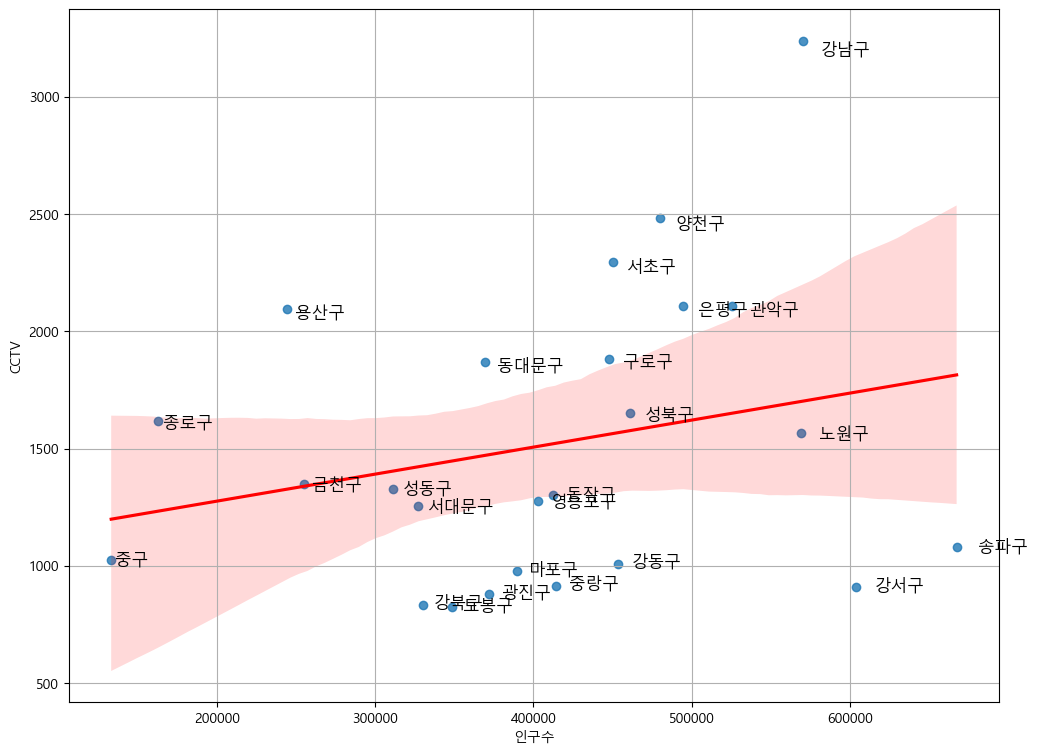

In [124]:
import seaborn as sns

plt.figure(figsize = (12, 9))

sns.regplot(x = '인구수', y = '소계', data = DF,
            line_kws = {'color':'red'})

for n in range(len(DF)):
    plt.text(DF['인구수'][n] * 1.02, 
             DF['소계'][n] * 0.98, 
             DF.index[n], 
             fontsize = 12)

plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

# 
# 
# 
# The End
# 
# 
# 